# 5.15 수업
# 형태소 분석기 사용 - 어근을 찾아내기 위함
## tokenize의 여러가지 방법

In [1]:
from konlpy.tag import Kkma

ma = Kkma()

In [2]:
from konlpy.corpus import kolaw, kobill
kolaw.fileids()
corpus = kolaw.open(kolaw.fileids()[0]).read()

In [12]:
from nltk.tokenize import sent_tokenize

morphemes = list()

for sentence in sent_tokenize(corpus):
    morphemes.extend(ma.morphs(sentence))
#     morphs => (형태소, 형태소)
#     nouns => (형태소 = 명사, 명사, )
#     pos => [('형태소', '품사'), ('형태소', '품사'), ('형태소', '품사')]

In [ ]:
print(morphemes)

#### matplotlib library 한글 설정

In [14]:
from matplotlib import rc, font_manager
path = "c:/Windows/Fonts/NanumGothic.ttf"
font = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font)

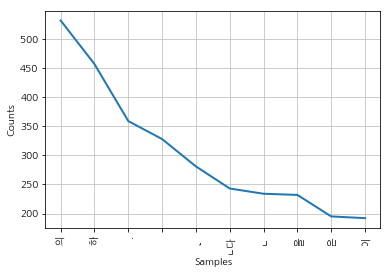

In [15]:
from nltk import Text

kolawText = Text(morphemes)
kolawText.vocab().most_common(10)
kolawText.plot(10)

저 국가 법관 법원 대통령 대한민국 정부 조국 국회 공무원 재판 타인 판결 근로 여자 국회의원 법률안 법령 농지 운동
정부 국가 법률 국민 경제 저 법원 양심 근로 근로자 국무총리 대법원 대한민국 헌법 조국 있 능력 그 국토 공무원


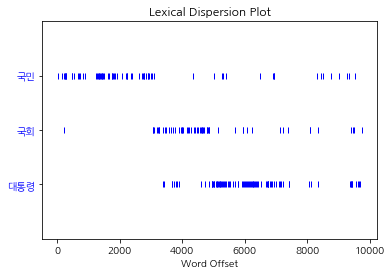

In [16]:
kolawText.vocab()["국민"]
kolawText.similar("국민"), kolawText.similar("국회")
kolawText.dispersion_plot(["국민", "국회", "대통령"])

# preprocessing - tokenizing, stemming(BPE), ngram/re, ma, pos

# 단어 빈도수 상위랭크 단어들은 그냥 주로 나오는 단어라 쓸 필요가 없다 불용어 제거 필요!

# 지프의 법칙

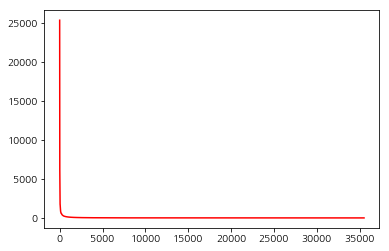

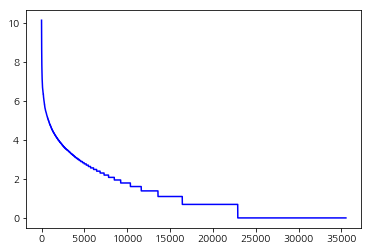

In [32]:
import os
import matplotlib.pyplot as plt
from math import log

from konlpy.tag import Okt #twitter -> Okt로 바꿈
ma = Okt()

base = "./news_crawl_project/"
morphemes = list()

for _ in os.listdir(base):
    tokens = list()
    with open(base + _, encoding='utf-8') as fp:
        text = fp.read()
    for sentence in sent_tokenize(text):
        morphemes.extend(ma.morphs(sentence))

obj = Text(morphemes)
x = range(len([_[0] for _ in obj.vocab().most_common()]))
y = [_[1] for _ in obj.vocab().most_common()]
yy = [log(_) for _ in y]

plt.plot(x, y, "r-")
plt.show()
# 로그취함 - 선형 형태로 변함
plt.plot(x, yy, "b-")
plt.show()


# 히프의 법칙

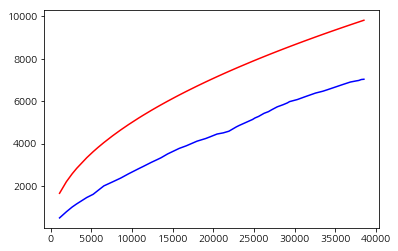

In [38]:
ma = Okt()

base = "./news_crawl_project/"
morphemes = list()

k = 50
b = 0.5 
# M = k * T ** b # M(유니크) = k * T(전체단어의수) ** b
text = ""
morphemes = list()
for _ in os.listdir(base)[:50]:
    tokens = list()
    with open(base + _, encoding='utf-8') as fp:
        text += fp.read()
    for sentence in sent_tokenize(text):
        tokens.extend(ma.morphs(sentence))
    morphemes.append(tokens)
        
obj = Text(morphemes)
x = [len(_) for _ in morphemes] # 전체단어의 수
y = [k*_**b for _ in x ]
yy = [len(set(_)) for _ in morphemes]

plt.plot(x, y, "r-")
# yy는 실제개수 y는 예측값
plt.plot(x, yy, "b-")
plt.show()


### 로그취하기 - 선형적으로 증가함!

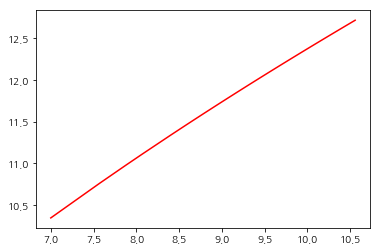

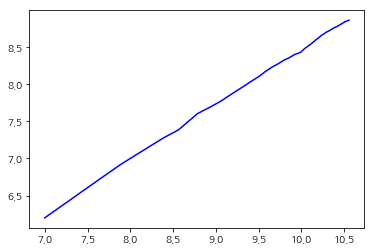

In [40]:
x = [log(len(_)) for _ in morphemes] # 전체단어의 수
y = [log(k)*_**b for _ in x ]
yy = [log(len(set(_))) for _ in morphemes]

plt.plot(x, y, "r-")
plt.show()
# yy는 실제개수 y는 예측값
plt.plot(x, yy, "b-")
plt.show()

# 토크나이즈하기 위한 또 다른 방법
MeCab -> linux, khaiii -> linux  윈도우는 cp949가 기본이라 잘 안씀<br>
text -> sentence split -> tokenize<br>
ngram으로 토크나이즈 - 다음의 나올 글자를 예측하기 위해 likelihood를 활용하여

Beautiful is bettern than ugly.<br>
1         2    3       4    5 6<br>

원시 코퍼스 -> 어절(원시) -> n-gram / 형태소 / 패턴(RE)

n-gram(bi-gram = n = 2)<br>
한글은 어절 = 형태소 조합이라 음절 단위, 어절 단위로 봄<br>
1 = Beautiful(횟수 / N)<br>
1, 2 = Beautiful is (횟수 / (1))<br>
2, 3 = is better(횟수 / (1, 2))<br>
3, 4 = better than(횟수 / (2, 3))<br>

P(4|1-3) => P(4|1, 2, 3) * P(3|1, 2) * P(2|1) * P(1)<br>
P(4|1-3) => P(4|3) * P(3|2) * P(2|1) * P(1)<br>
=> 1st Markov Assumption 결합확률을 계산하지 않고 맨 앞에 것만 본다<br>
word_tokenze()<br>
 
P(4|3) => 4 hits / 3 hits 모든 조합의 수 구하기 힘듬<br>

글자가 너무 많이 뻥튀기 되는 문제<br>


In [51]:
# bigram 구현
def eojeol(text, n=2):
    ngram = list()
    tokens = text.split()
    for i in range(len(tokens)-(n-1)):
        ngram.append(" ".join(tokens[i:i+n]))
    return ngram

In [52]:
eojeol("가 나 다 라", n=3)

['가 나 다', '나 다 라']

In [53]:
for _ in sent_tokenize(corpus):
    print(eojeol(_, n=2))
    break

['대한민국헌법 유구한', '유구한 역사와', '역사와 전통에', '전통에 빛나는', '빛나는 우리', '우리 대한국민은', '대한국민은 3·1운동으로', '3·1운동으로 건립된', '건립된 대한민국임시정부의', '대한민국임시정부의 법통과', '법통과 불의에', '불의에 항거한', '항거한 4·19민주이념을', '4·19민주이념을 계승하고,', '계승하고, 조국의', '조국의 민주개혁과', '민주개혁과 평화적', '평화적 통일의', '통일의 사명에', '사명에 입각하여', '입각하여 정의·인도와', '정의·인도와 동포애로써', '동포애로써 민족의', '민족의 단결을', '단결을 공고히', '공고히 하고,', '하고, 모든', '모든 사회적', '사회적 폐습과', '폐습과 불의를', '불의를 타파하며,', '타파하며, 자율과', '자율과 조화를', '조화를 바탕으로', '바탕으로 자유민주적', '자유민주적 기본질서를', '기본질서를 더욱', '더욱 확고히', '확고히 하여', '하여 정치·경제·사회·문화의', '정치·경제·사회·문화의 모든', '모든 영역에', '영역에 있어서', '있어서 각인의', '각인의 기회를', '기회를 균등히', '균등히 하고,', '하고, 능력을', '능력을 최고도로', '최고도로 발휘하게', '발휘하게 하며,', '하며, 자유와', '자유와 권리에', '권리에 따르는', '따르는 책임과', '책임과 의무를', '의무를 완수하게', '완수하게 하여,', '하여, 안으로는', '안으로는 국민생활의', '국민생활의 균등한', '균등한 향상을', '향상을 기하고', '기하고 밖으로는', '밖으로는 항구적인', '항구적인 세계평화와', '세계평화와 인류공영에', '인류공영에 이바지함으로써', '이바지함으로써 우리들과', '우리들과 우리들의', '우리들의 자손의', '자손의 안전과', '안전과 자유와', '자유와 행복을', '행복을 영원히', '영원히 확보할', '확보할 것을', '것을 다짐하면서', '다짐하면서 1948년', '1948년 7월

In [64]:
# bigram 구현
def umjeol(text, n=2):
    ngram = list()
    for i in range(len(text)-(n-1)):
        ngram.append("".join(text[i:i+n]))
    return ngram

In [65]:
umjeol("국민의 국민에게")

for _ in sent_tokenize(corpus):
    print(umjeol(_, n=2))
    break

['대한', '한민', '민국', '국헌', '헌법', '법\n', '\n\n', '\n유', '유구', '구한', '한 ', ' 역', '역사', '사와', '와 ', ' 전', '전통', '통에', '에 ', ' 빛', '빛나', '나는', '는 ', ' 우', '우리', '리 ', ' 대', '대한', '한국', '국민', '민은', '은 ', ' 3', '3·', '·1', '1운', '운동', '동으', '으로', '로 ', ' 건', '건립', '립된', '된 ', ' 대', '대한', '한민', '민국', '국임', '임시', '시정', '정부', '부의', '의 ', ' 법', '법통', '통과', '과 ', ' 불', '불의', '의에', '에 ', ' 항', '항거', '거한', '한 ', ' 4', '4·', '·1', '19', '9민', '민주', '주이', '이념', '념을', '을 ', ' 계', '계승', '승하', '하고', '고,', ', ', ' 조', '조국', '국의', '의 ', ' 민', '민주', '주개', '개혁', '혁과', '과 ', ' 평', '평화', '화적', '적 ', ' 통', '통일', '일의', '의 ', ' 사', '사명', '명에', '에 ', ' 입', '입각', '각하', '하여', '여 ', ' 정', '정의', '의·', '·인', '인도', '도와', '와 ', ' 동', '동포', '포애', '애로', '로써', '써 ', ' 민', '민족', '족의', '의 ', ' 단', '단결', '결을', '을 ', ' 공', '공고', '고히', '히 ', ' 하', '하고', '고,', ', ', ' 모', '모든', '든 ', ' 사', '사회', '회적', '적 ', ' 폐', '폐습', '습과', '과 ', ' 불', '불의', '의를', '를 ', ' 타', '타파', '파하', '하며', '며,', ', ', ' 자', '자율', '율과', '과 ', ' 조', '조화', '화를',

In [66]:
bigram = eojeol(corpus) # 2어절 패턴
bigramText = Text(bigram)

In [67]:
bigramText.vocab()

FreqDist({'수 있다.': 56, '법률이 정하는': 48, '정하는 바에': 37, '바에 의하여': 36, '법률로 정한다.': 28, '모든 국민은': 23, '수 없다.': 20, '① 모든': 14, '사항은 법률로': 14, '의무를 진다.': 11, ...})

# 어절, 음절 ngram -> 순위, similar, (zipf, heaps) 어떻게 바뀌는지 확인

In [69]:
bigram = eojeol(corpus) # 2어절 패턴
bigramText = Text(bigram)

In [71]:
bigramText.vocab().most_common(10)

[('수 있다.', 56),
 ('법률이 정하는', 48),
 ('정하는 바에', 37),
 ('바에 의하여', 36),
 ('법률로 정한다.', 28),
 ('모든 국민은', 23),
 ('수 없다.', 20),
 ('① 모든', 14),
 ('사항은 법률로', 14),
 ('의무를 진다.', 11)]

No matches


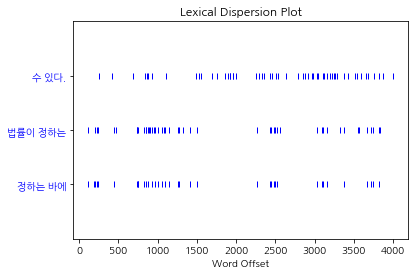

In [72]:
bigramText.similar("수 있다.")
bigramText.dispersion_plot(["수 있다.", "법률이 정하는", "정하는 바에"])

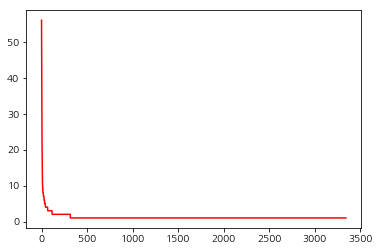

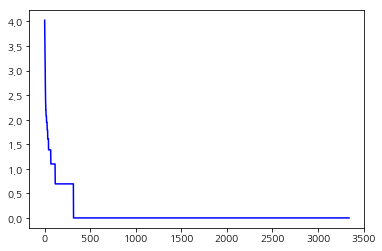

In [76]:
ma = Okt()

x = range(len([_[0] for _ in bigramText.vocab().most_common()]))
y = [_[1] for _ in bigramText.vocab().most_common()]
yy = [log(_) for _ in y]

plt.plot(x, y, "r-")
plt.show()
# 로그취함 - 선형 형태로 변함
plt.plot(x, yy, "b-")
plt.show()


In [ ]:
ma = Okt()

base = "./news_crawl_project/"
morphemes = list()

k = 50
b = 0.5 
# M = k * T ** b # M(유니크) = k * T(전체단어의수) ** b
text = ""
morphemes = list()
for _ in os.listdir(base)[:50]:
    tokens = list()
    with open(base + _, encoding='utf-8') as fp:
        text += fp.read()
    for sentence in sent_tokenize(text):
        tokens.extend(ma.morphs(sentence))
    morphemes.append(tokens)
        
obj = Text(morphemes)
x = [len(_) for _ in morphemes] # 전체단어의 수
y = [k*_**b for _ in x ]
yy = [len(set(_)) for _ in morphemes]

plt.plot(x, y, "r-")
# yy는 실제개수 y는 예측값
plt.plot(x, yy, "b-")
plt.show()


In [78]:
bigramText

<Text: 대한민국헌법 유구한 유구한 역사와 역사와 전통에 전통에 빛나는 빛나는 우리 우리 대한국민은 대한국민은 3·1운동으로 3·1운동으로 건립된...>

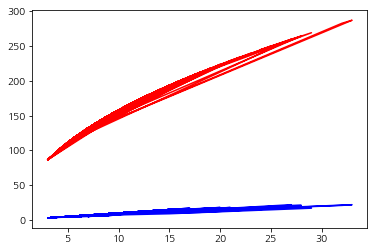

In [77]:
k = 50
b = 0.5 
# M = k * T ** b # M(유니크) = k * T(전체단어의수) ** b
# obj = Text(morphemes)
bigramText
x = len() # 전체단어의 수
y = [k*_**b for _ in x ]
yy = [len(set(_)) for _ in bigramText]

plt.plot(x, y, "r-")
# yy는 실제개수 y는 예측값
plt.plot(x, yy, "b-")
plt.show()


# word piece model
### 단어를 내부 단어들로 분리하는 단어 분리 모델

# BPE BYTE PAIR ENCODING
("어절"ㅣ빈도), ("어절"| 빈도), ("어절"ㅣ빈도), ("어절"| 빈도)<br>
low:5, lowest:2<br>
l o w </w><br>
l o w e s t </w><br>

In [91]:
def splitTerm(term):
    result = list()
    for token in term.split():
        result.append(" ".join(list(term) + ["</w>"]))
    return " _ ".join(result)
#     print(" ".join(list(term) + ["</w>"])) # /w는 단어의 경계

In [92]:
splitTerm("lowest lower").split()

['l',
 'o',
 'w',
 'e',
 's',
 't',
 'l',
 'o',
 'w',
 'e',
 'r',
 '</w>',
 '_',
 'l',
 'o',
 'w',
 'e',
 's',
 't',
 'l',
 'o',
 'w',
 'e',
 'r',
 '</w>']

In [196]:
data = {
    splitTerm("low"):5,
    splitTerm("lowest"):2,
    splitTerm("newer"):6,
    splitTerm("wider"):3
}

In [197]:
data

{'l o w </w>': 5,
 'l o w e s t </w>': 2,
 'n e w e r </w>': 6,
 'w i d e r </w>': 3}

In [198]:
from collections import defaultdict

def ngram(data, n=2):
    result = defaultdict(int)
    for term, freq in data.items():
        tokens = term.split()
        for i in range(len(tokens)-(n-1)):
#             key = " ".join(tokens[i:i+n])
#             if key in result.keys():
#                 result[key] += freq
#             else:
#                 result[key] = freq
            result[" ".join(tokens[i:i+n])] += freq
            
    return result

In [199]:
bigram = ngram(data)
ngram(data) # e, r merge 해서 한글자로 만들어서 계속 다시실행해야함!

defaultdict(int,
            {'l o': 7,
             'o w': 7,
             'w </w>': 5,
             'w e': 8,
             'e s': 2,
             's t': 2,
             't </w>': 2,
             'n e': 6,
             'e w': 6,
             'e r': 9,
             'r </w>': 9,
             'w i': 3,
             'i d': 3,
             'd e': 3})

In [200]:
# maxKey = max(bigram, key=bigram.get()) # 맥스가 되는 키값
# mergeNgram(maxKey, ngram)
def mergeNgram(maxKey, data):
    
    newData = dict()
    
    for term, frequency in data.items():
        newKey = re.sub(maxKey, maxKey.replace(" ", ""), term)
        newData[newKey] = freq
    return newData

In [168]:
import re
pattern = "e r"
re.findall(pattern, list(data.keys())[0])

['e r']

In [192]:
maxKey = max(bigram, key=bigram.get)
maxKey

'e r'

In [201]:
for _ in range(5):
    bigram = ngram(data)
    maxKey = max(bigram, key=bigram.get)
    data = mergeNgram(maxKey, data)
#     print(data)
data

{'low</w>': 5, 'low e s t </w>': 5, 'n e w er</w>': 5, 'w i d er</w>': 5}